# How the Honey Production, Number of Colonies and Yield Per Colony Changed over the years

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.express as px
from matplotlib import pyplot as plt

## Importing Data

In [2]:
honeyproduction_DS = pd.read_csv("../Data/honeyproduction_w_State.csv")

In [3]:
honeyproduction_DS.head()

,Unnamed: 0,State_Code,Num_of_Colony,Production_per_Colony,Total_Production,Stock_Held,Price_per_Pound,Total_Production_Value,Year,State_Name
0,1,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,Alabama
1,2,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,Arizona
2,3,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,Arkansas
3,4,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,California
4,5,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,Colorado


In [3]:
Honey_DS = honeyproduction_DS

In [3]:
#abc = honeyproduction_DS

In [ ]:
#abc.groupby(['Name','Type','ID'], as_index=False).count()


In [4]:
Honey_DS.drop("Unnamed: 0", axis=1, inplace=True)

### Over all Analyses

### Graphing the Yield Per Colony, Total Production, Total Production Values of all the States over the years

In [5]:
Honey_DS_Mean = Honey_DS.groupby('Year').mean()

<AxesSubplot:xlabel='Year'>

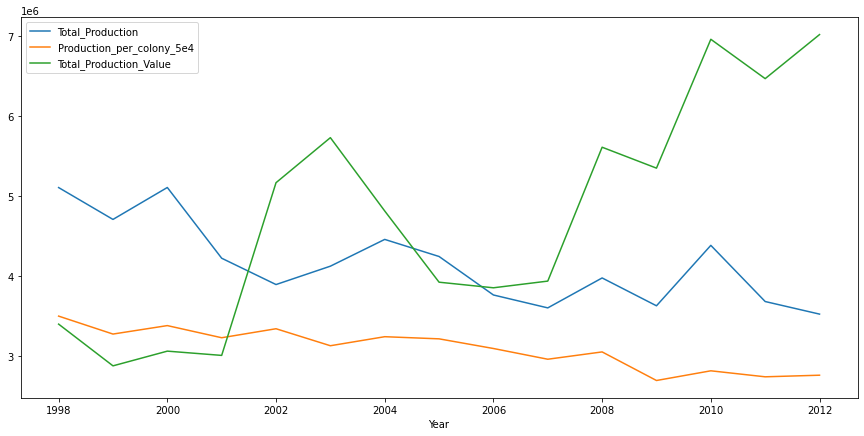

In [14]:
Honey_DS_Mean['Production_per_colony_5e4'] = 50000*Honey_DS_Mean['Production_per_Colony']

Honey_DS_Mean[['Total_Production', 'Production_per_colony_5e4', 'Total_Production_Value']].plot(ax=plt.subplots(figsize=(15,7))[1])

## This graph shows that Total Honey Production is declining , YET, the Production Value is constantly increasing. 
## Meaning the prices are going up.
## The Yield per colony is pretty much constant over the years.

### Checking how the prices are trending

<AxesSubplot:xlabel='Year'>

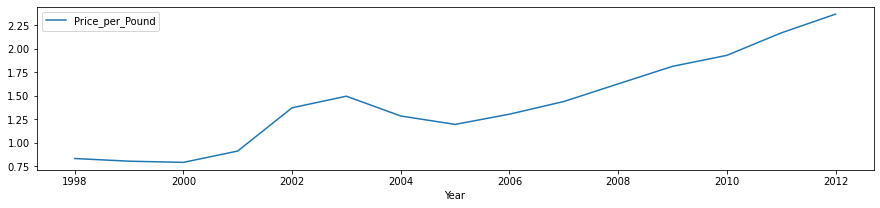

In [15]:
Honey_DS_Mean[['Price_per_Pound']].plot(ax=plt.subplots(figsize=(15,3))[1])

## Wow the prices are soaring.

### Checking Yield Per Colony over the years

<AxesSubplot:xlabel='Year'>

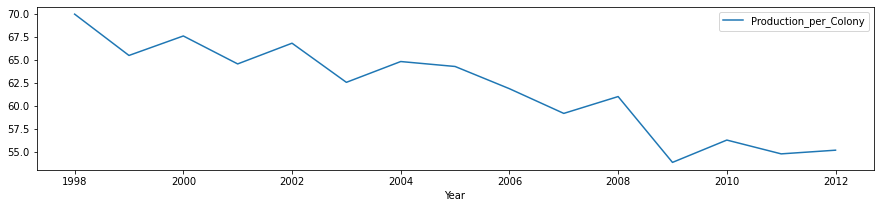

In [16]:
Honey_DS_Mean[['Production_per_Colony']].plot(ax=plt.subplots(figsize=(15,3))[1])

## There is a clear downward trend in the Yield of Honey per year over the years.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'North Dakota'),
  Text(1, 0, 'California'),
  Text(2, 0, 'South Dakota'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Montana'),
  Text(5, 0, 'Minnesota'),
  Text(6, 0, 'Texas'),
  Text(7, 0, 'Wisconsin'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'Idaho'),
  Text(10, 0, 'New York'),
  Text(11, 0, 'Louisiana'),
  Text(12, 0, 'Arkansas'),
  Text(13, 0, 'Georgia'),
  Text(14, 0, 'Nebraska'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Wyoming'),
  Text(17, 0, 'Washington'),
  Text(18, 0, 'Arizona'),
  Text(19, 0, 'Colorado'),
  Text(20, 0, 'Oregon'),
  Text(21, 0, 'Mississippi'),
  Text(22, 0, 'Utah'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Pennsylvania'),
  Text(25, 0, 'Ohio'),
  Text(26, 0, 'Alabama'),
  Text(27, 0, 'Hawaii'),
  Text(28, 0, 'Kansas'),
  Text(29, 0, 'New Mexico'),
  Te

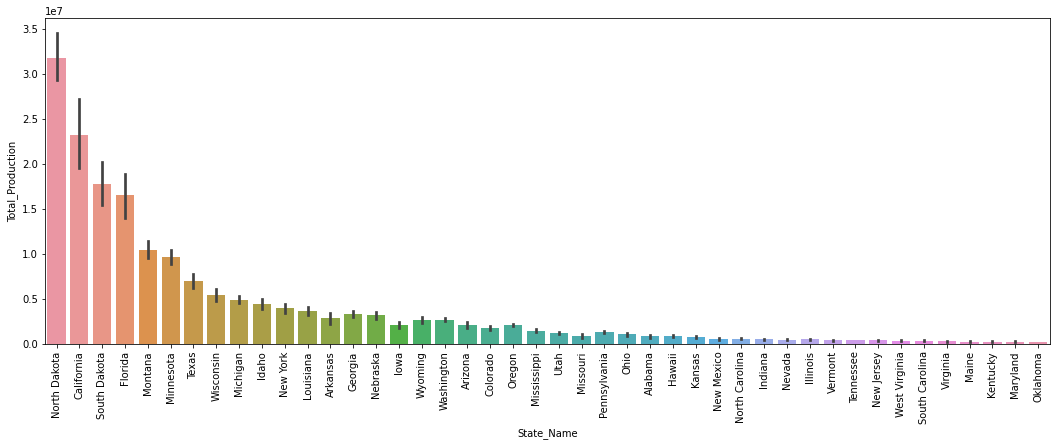

In [29]:
Honey_DS_sorted = Honey_DS.sort_values('Total_Production', ascending = False)

plt.figure(figsize=(18,6)) 
sns.barplot(x = 'State_Name', y= 'Total_Production', data=Honey_DS_sorted)
plt.xticks(rotation=90)

## As we can see North Dakota, California,South Dakota and Florida are the top honey producing states over the years.
## Maryland, Oklohoma, Kentucky and South Carolina producing the least.

### As we saw there is a decline in Production over the years, let's see  what states showed more decline and which one less.


In [6]:
# Dataset to keep maximum of total production from the states

Max_Prod_State = Honey_DS[['State_Name','Total_Production']].groupby('State_Name').max()
Max_Prod_State.reset_index(level = 0, inplace = True)
Max_Prod_State.columns = ['State', 'Max_Prod']

Max_Prod_State.head()

,State,Max_Prod
0,Alabama,1248000.0
1,Arizona,3300000.0
2,Arkansas,4900000.0
3,California,37350000.0
4,Colorado,2700000.0


In [8]:
# Dataset to keep minimum of total production from the states

Min_Prod_State = Honey_DS[['State_Name','Total_Production']].groupby('State_Name').min()
Min_Prod_State.reset_index(level = 0, inplace = True)
Min_Prod_State.columns = ['State', 'Min_Prod']

Min_Prod_State.head()

,State,Min_Prod
0,Alabama,432000.0
1,Arizona,1012000.0
2,Arkansas,1368000.0
3,California,11550000.0
4,Colorado,1200000.0


In [9]:
# Merging the two DataSets 

State_Prod = pd.merge(Max_Prod_State, Min_Prod_State, how = 'inner', on = 'State')
State_Prod.head()

,State,Max_Prod,Min_Prod
0,Alabama,1248000.0,432000.0
1,Arizona,3300000.0,1012000.0
2,Arkansas,4900000.0,1368000.0
3,California,37350000.0,11550000.0
4,Colorado,2700000.0,1200000.0


In [10]:
# Calculating the percentage change in Honey Production

State_Prod['Change_Percent'] = ((State_Prod['Max_Prod'] - State_Prod['Min_Prod'])/State_Prod['Max_Prod'])*100

State_Prod.sort_values(by = 'Change_Percent', ascending = False, inplace = True)
State_Prod.head()


,State,Max_Prod,Min_Prod,Change_Percent
20,Missouri,1725000.0,344000.0,80.057971
25,New Mexico,960000.0,246000.0,74.375000
15,Maine,451000.0,120000.0,73.392461
16,Maryland,308000.0,84000.0,72.727273
12,Kansas,1120000.0,308000.0,72.500000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Missouri'),
  Text(1, 0, 'New Mexico'),
  Text(2, 0, 'Maine'),
  Text(3, 0, 'Maryland'),
  Text(4, 0, 'Kansas'),
  Text(5, 0, 'Vermont'),
  Text(6, 0, 'Arkansas'),
  Text(7, 0, 'Iowa'),
  Text(8, 0, 'Arizona'),
  Text(9, 0, 'California'),
  Text(10, 0, 'Wyoming'),
  Text(11, 0, 'Indiana'),
  Text(12, 0, 'Virginia'),
  Text(13, 0, 'Alabama'),
  Text(14, 0, 'New Jersey'),
  Text(15, 0, 'Nevada'),
  Text(16, 0, 'Ohio'),
  Text(17, 0, 'South Dakota'),
  Text(18, 0, 'West Virginia'),
  Text(19, 0, 'Illinois'),
  Text(20, 0, 'North Carolina'),
  Text(21, 0, 'Idaho'),
  Text(22, 0, 'Tennessee'),
  Text(23, 0, 'New York'),
  Text(24, 0, 'Wisconsin'),
  Text(25, 0, 'Colorado'),
  Text(26, 0, 'Kentucky'),
  Text(27, 0, 'Utah'),
  Text(28, 0, 'Florida'),
  Text(29, 0, 'Nebraska'),
  T

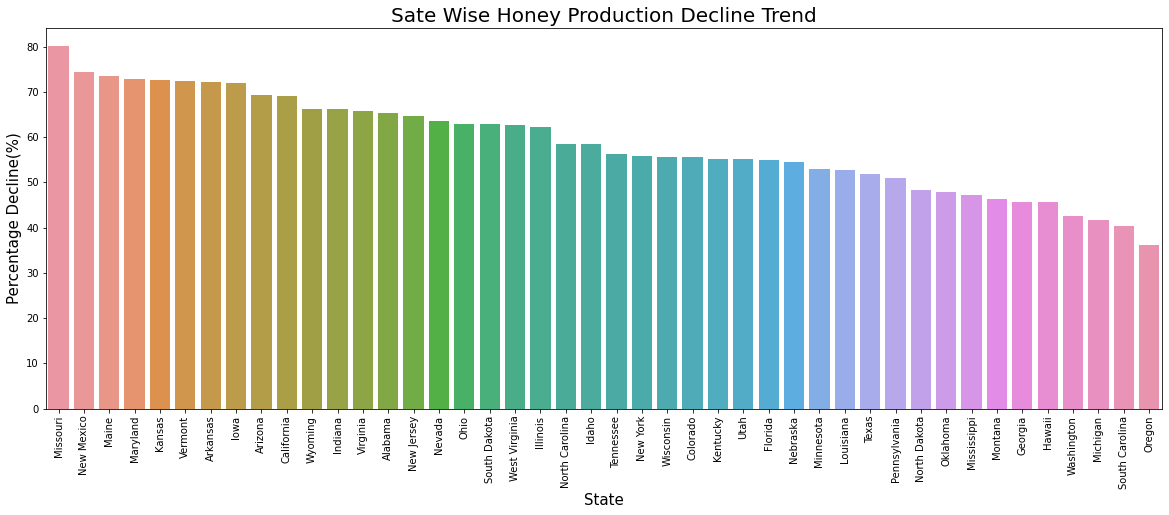

In [12]:
# Creating a Bar graph to visualize what States had maximum and minimum percentage change in honey production.

plt.figure(figsize=(20,7))
sns.barplot(x = 'State', y= 'Change_Percent', data = State_Prod)
plt.title('Sate Wise Honey Production Decline Trend', fontsize = 20)
plt.xlabel("State", fontsize=15)
plt.ylabel("Percentage Decline(%)", fontsize=15)
plt.xticks(rotation=90)


## We can see Missouri, New Mexico, Maine have highest rate of decline in honey production 
## while Michigan, South Carolina and Oregon have the least decline.

### Checking correlation between different numeric variables

In [7]:
Honey_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              626 non-null    object 
 1   Num_of_Colony           626 non-null    float64
 2   Production_per_Colony   626 non-null    int64  
 3   Total_Production        626 non-null    float64
 4   Stock_Held              626 non-null    float64
 5   Price_per_Pound         626 non-null    float64
 6   Total_Production_Value  626 non-null    float64
 7   Year                    626 non-null    int64  
 8   State_Name              626 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 44.1+ KB


In [8]:
cor = Honey_DS[['Num_of_Colony', 
              'Production_per_Colony', 
              'Total_Production', 
              'Price_per_Pound', 
              'Total_Production_Value']].corr()

cor

,Num_of_Colony,Production_per_Colony,Total_Production,Price_per_Pound,Total_Production_Value
Num_of_Colony,1.000000,0.243515,0.953594,-0.232701,0.912796
Production_per_Colony,0.243515,1.000000,0.396252,-0.358646,0.278977
Total_Production,0.953594,0.396252,1.000000,-0.264499,0.907236
Price_per_Pound,-0.232701,-0.358646,-0.264499,1.000000,-0.089567
Total_Production_Value,0.912796,0.278977,0.907236,-0.089567,1.000000


## We can see that Total Production Value and Total Production are positvely correlated with Number of colonies.
## No other significamt correlation can be seen.

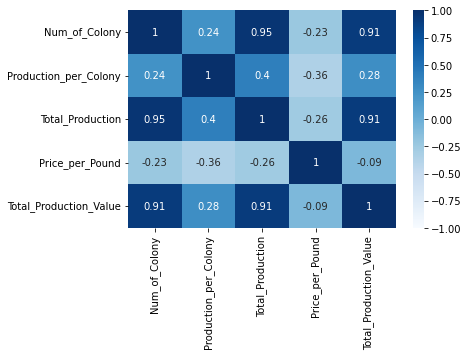

In [16]:
## Heat Map of Correlation matrix

sns.heatmap(cor,annot=True,cmap='Blues',vmin=-1,vmax=1);


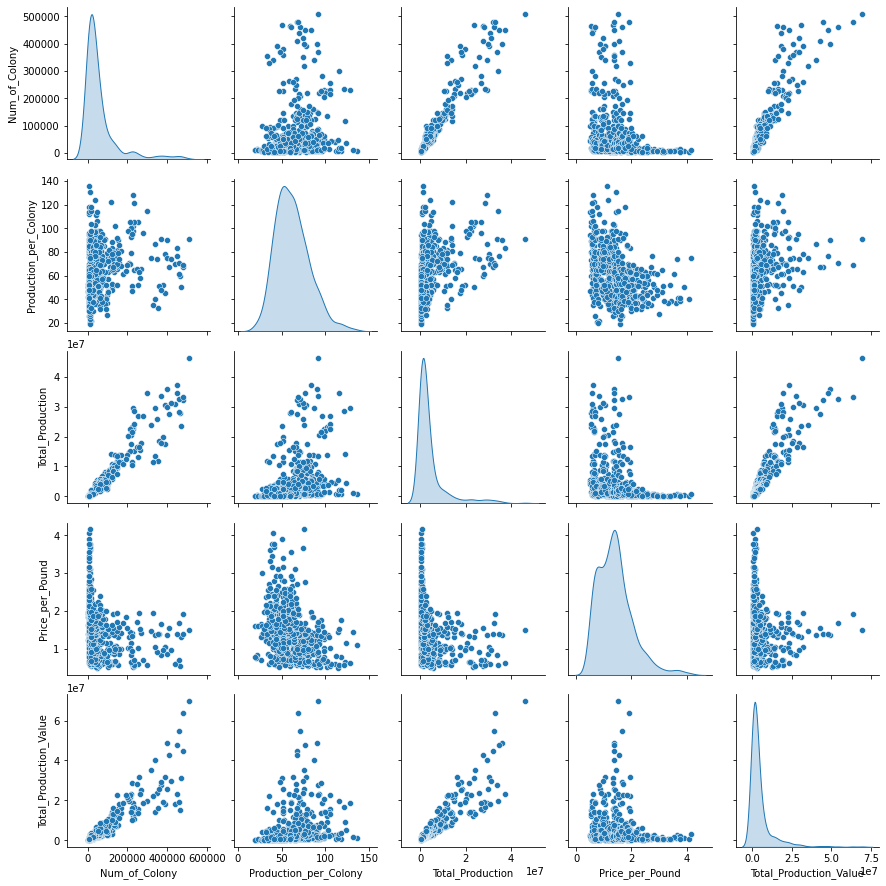

In [11]:
sns.pairplot(Honey_DS[['Num_of_Colony', 
              'Production_per_Colony', 
              'Total_Production', 
              'Price_per_Pound', 
              'Total_Production_Value']],diag_kind='kde');